In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
pd.set_option('precision', 3)
plt.rcParams.update({'font.size': 15})
fig_path = '/home/arthur/Documents/Doutorado/papers/rec/umuai/opt'

In [32]:
dataset = 'lastfm'
slugs_df = pd.read_csv('slugs_%s.csv' % dataset, sep=';').set_index('Metrics')
folder='/home/arthur/Documents/Doutorado/exp/recommendation/ludewig/results/ir/next/%s/final/' % dataset
files= ['test_window_next_knn_%s.%s.csv', 'test_window_next_knn2_%s.%s.csv', 'test_window_next_rules_%s.%s.csv', 'test_window_next_neural_%s.%s.csv']
#files= ['test_window_next_knn_%s.%s.csv']
num_slices = 5
dfx = None
df = None
for j, file in enumerate(files):
    for slice_num in range(num_slices):
        filename = os.path.join(folder, file % (dataset, slice_num))
        if slice_num == 0 and j == 0:
            df = pd.read_csv(filename, sep=';')
        else:
            dfx = pd.read_csv(filename, sep=';')[:]
            df = df.append(dfx)
metr = df.Metrics.values
df = df.groupby(['Metrics']).mean()
df = df.reset_index()
df.set_index('Metrics', inplace=True)

In [33]:
#for ii in df.index:
#    print(ii)

In [34]:

df.insert(0, 'metrics', slugs_df['slug'])
df = df[df.metrics != 'skip']
df.reset_index(drop=True, inplace=True)
df.columns
xdf = df[['metrics', 'HitRate@1: ', 'HitRate@20: ', 'MRR@1: ', 'MRR@20: ']].sort_values('MRR@20: ', ascending=False)
xdf.style.background_gradient(axis = 0, cmap='Blues')
#xdf = df[['Metrics', 'MRR@20: ']].sort_values('MRR@20: ', ascending=False)
#xdf.head(49)

,metrics,HitRate@1:,HitRate@20:,MRR@1:,MRR@20:
3,IR-MC,0.315,0.413,0.315,0.346
7,SR,0.286,0.462,0.286,0.335
1,GRU4Rec,0.280,0.456,0.280,0.330
5,MC,0.287,0.412,0.287,0.327
4,IR-TFIDF,0.171,0.340,0.171,0.224
0,AR,0.106,0.484,0.106,0.202
8,STAN,0.055,0.493,0.055,0.179
9,VSKNN,0.057,0.523,0.057,0.172
6,SKNN,0.050,0.507,0.050,0.141
2,IR-1NN,0.110,0.163,0.110,0.133


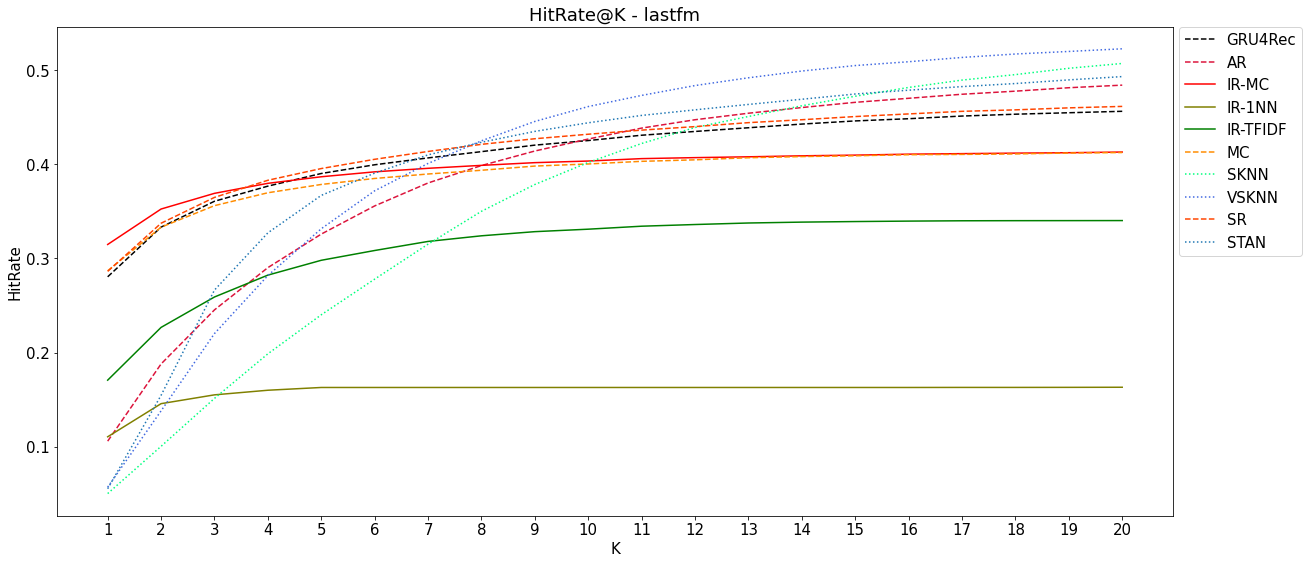

In [35]:
cl = ['HitRate@%s: ' % x for x in range(1, 21)]
df_hr = df[['metrics'] + cl].T
refs = slugs_df.set_index('slug')
lines = {'neural': '--', 'IR': '-', 'kNN': ':', 'rules': '--'}
algs = refs[refs.index != 'skip']

new_header = df_hr.iloc[0] 
df_hr = df_hr[1:]
df_hr.columns = new_header 
blacklist = ['ir_mc-past_items=1', 'ir_mc-past_items=2', 'ir_mc-past_items=3', 'ir_mc-past_items=5', 'ir_mc-past_items=6']

plt.figure(figsize=(20, 9))
for col in algs.index:
    ref = refs.loc[col]
    color = ref.color if ref.color != 'skip' else None
    plt.plot(df_hr[col], label=col, 
             color=color, 
             linestyle=lines[refs.loc[col].alg_type])
plt.legend(algs.index, bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0.)
#fig.legend(np.array(lines)[order], y.columns[order])

plt.xticks(range(20), range(1, 21))
plt.xlabel('K')
plt.ylabel('HitRate')
plt.title("HitRate@K - %s" % dataset)
plt.savefig(os.path.join(fig_path, '%s_hit_rate.pdf' % dataset), format='pdf')
plt.show()

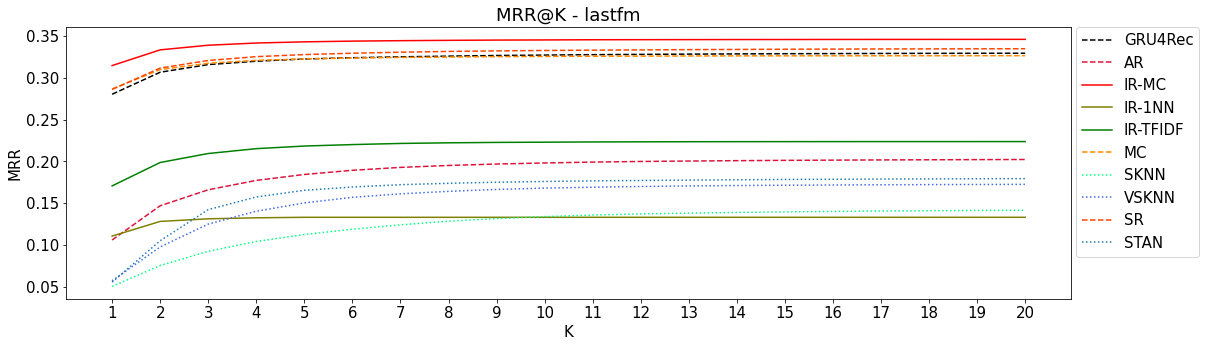

In [36]:
cl = ['MRR@%s: ' % x for x in range(1, 21)]
df_mrr = df[['metrics'] + cl].T
#df_mrr = df[interv].T
new_header = df_mrr.iloc[0] 
df_mrr = df_mrr[1:]
df_mrr.columns = new_header 
refs = slugs_df.set_index('slug')
lines = {'neural': '--', 'IR': '-', 'kNN': ':', 'rules': '--'}
alpha = {'neural': 1, 'IR': 1, 'kNN': 0.6, 'rules': 0.8}
algs = refs[refs.index != 'skip']


plt.figure(figsize=(18, 5))
for col in algs.index:
    ref = refs.loc[col]
    color = ref.color if ref.color != 'skip' else None    
    plt.plot(df_mrr[col], label=col,
             color=color, 
             linestyle=lines[refs.loc[col].alg_type])
plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0.)
plt.xticks(range(20), range(1, 21))
plt.xlabel('K')
plt.ylabel('MRR')
plt.title("MRR@K - %s" % dataset)
plt.savefig(os.path.join(fig_path, '%s_mrr.pdf' % dataset), format='pdf')
plt.show()

In [37]:
txt = xdf.to_latex(col_space=1, index=False)
open('/home/arthur/Documents/Doutorado/papers/rec/umuai/opt/tbl_%s.tex' % dataset, 'w').write(txt)
xdf.set_index('metrics')

,HitRate@1:,HitRate@20:,MRR@1:,MRR@20:
metrics,,,,
IR-MC,0.315,0.413,0.315,0.346
SR,0.286,0.462,0.286,0.335
GRU4Rec,0.280,0.456,0.280,0.330
MC,0.287,0.412,0.287,0.327
IR-TFIDF,0.171,0.340,0.171,0.224
AR,0.106,0.484,0.106,0.202
STAN,0.055,0.493,0.055,0.179
VSKNN,0.057,0.523,0.057,0.172
SKNN,0.050,0.507,0.050,0.141


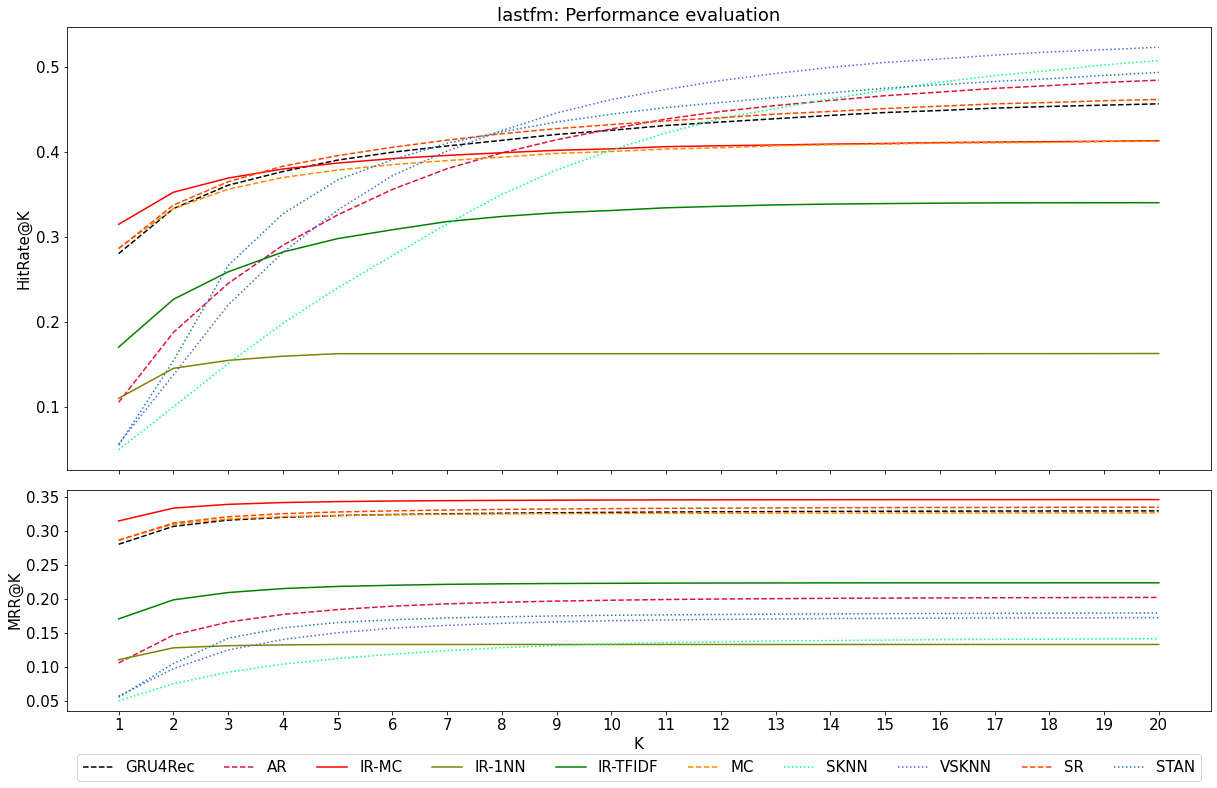

In [38]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18, 11), gridspec_kw={'height_ratios': [3, 1.5]})

cl = ['HitRate@%s: ' % x for x in range(1, 21)]
df_hr = df[['metrics'] + cl].T
refs = slugs_df.set_index('slug')
#lines = {'neural': '--', 'IR': '-', 'kNN': (0, (3, 1, 1,1, 1)), 'rules': (0, (3, 1, 1,1))}
lines = {'neural': '--', 'IR': '-', 'kNN': ':', 'rules': '--'}
algs = refs[refs.index != 'skip']

new_header = df_hr.iloc[0] 
df_hr = df_hr[1:]
df_hr.columns = new_header 

#plt.figure(figsize=(18, 9))
for col in algs.index:
    ref = refs.loc[col]
    color = ref.color if ref.color != 'skip' else None
    ax1.plot(df_hr[col], label=col, 
             color=color, 
             linestyle=lines[refs.loc[col].alg_type])


for col in algs.index:
    ref = refs.loc[col]
    color = ref.color if ref.color != 'skip' else None    
    ax2.plot(df_mrr[col], label=col,
             color=color, 
             linestyle=lines[refs.loc[col].alg_type])    
    
#ax1.legend(algs.index, bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0.)
#fig.legend(np.array(lines)[order], y.columns[order])
ax2.legend(bbox_to_anchor=(0.5, -.35), loc='lower center', ncol=10)
plt.xticks(range(20), range(1, 21))
plt.xlabel('K')
ax1.set_ylabel('HitRate@K')
ax2.set_ylabel('MRR@K')
#plt.title("HitRate@K - %s" % dataset)
ax1.set_title("%s: Performance evaluation" % dataset)
plt.tight_layout()
plt.savefig(os.path.join(fig_path, '%s_performance.pdf' % dataset), format='pdf')
plt.show()

In [39]:
#xdf = df[['metrics', 'Coverage@20: ', 'Popularity@20: ', 'Training time:', 'Testing time seconds:', 'Memory usage:']] #.sort_values('MRR@1: ', ascending=False)
xdf = df[['metrics', 'Coverage@20: ', 'Popularity@20: ', 'Training time:', 'Testing time seconds:']] #.sort_values('MRR@1: ', ascending=False)
#xdf['Memory usage:'] = xdf['Memory usage:'] / 1000000
xdf.style.background_gradient(axis = 0, cmap='Blues')
#df

,metrics,Coverage@20:,Popularity@20:,Training time:,Testing time seconds:
0,AR,0.490,0.060,4.542,0.034
1,GRU4Rec,0.564,0.049,4085.665,0.030
2,IR-1NN,0.057,0.022,5.146,0.020
3,IR-MC,0.356,0.042,4.545,0.025
4,IR-TFIDF,0.236,0.034,5.043,0.029
5,MC,0.355,0.042,1.307,0.024
6,SKNN,0.316,0.065,1.534,0.232
7,SR,0.498,0.054,4.124,0.032
8,STAN,0.530,0.055,1.268,0.291
9,VSKNN,0.509,0.048,1.682,0.192
